# Import Library + 3 dataset

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns


from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

l = pd.read_csv('automobile-losses.csv')
r = pd.read_csv('automobile-risk.csv')
s = pd.read_csv('automobile-spec.csv')

# Menggabungkan DataSet

In [176]:
join1 = pd.merge(l,r,how='left',on='ID')
data = pd.merge(join1,s,how='left',on='ID')
data.head()

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,NaN,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,NaN,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,NaN,1,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,164.0,2,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,164.0,2,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


# Find and handling missing value

In [177]:
#count how many missing values per field
count_missing = data.isnull().sum().sort_values(ascending = False)
count_missing.head(10)

normalized-losses    41
price                 4
stroke                4
bore                  4
peak-rpm              2
horsepower            2
num-of-doors          1
wheel-base            0
symboling             0
make                  0
dtype: int64

missing value yang bertipe string akan diisi dengan modus, dan untuk yang bertipe number akan diisi dengan median dari kolom tersebut

In [178]:
data['normalized-losses'] = data['normalized-losses'].fillna(data['normalized-losses'].median())
data['price'] = data['price'].fillna(data['price'].median())
data['stroke'] = data['stroke'].fillna(data['stroke'].median())
data['bore'] = data['bore'].fillna(data['bore'].median())
data['peak-rpm'] = data['peak-rpm'].fillna(data['peak-rpm'].median())
data['horsepower'] = data['horsepower'].fillna(data['horsepower'].median())
data['num-of-doors'] = data['num-of-doors'].fillna(data['num-of-doors'].mode().values[0])
data.head(15)

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,115.0,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,115.0,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,115.0,1,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,164.0,2,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,164.0,2,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,6,115.0,2,audi,gas,std,two,sedan,fwd,front,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,7,158.0,1,audi,gas,std,four,sedan,fwd,front,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,8,115.0,1,audi,gas,std,four,wagon,fwd,front,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,9,158.0,1,audi,gas,turbo,four,sedan,fwd,front,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,10,115.0,0,audi,gas,turbo,two,hatchback,4wd,front,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,10295.0


In [179]:
#count how many missing values per field
count_missing = data.isnull().sum().sort_values(ascending = False)
count_missing.head()

price                0
width                0
normalized-losses    0
symboling            0
make                 0
dtype: int64

Missing Value sudah tidak ada

# Menambahkan Feature dimension (length x width x Height)

In [180]:
data['dimension'] = data['length']*data['width']*data['height']
data.head(3)

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,dimension
0,1,115.0,3,alfa-romero,gas,std,two,convertible,rwd,front,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,528019.904
1,2,115.0,3,alfa-romero,gas,std,two,convertible,rwd,front,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,528019.904
2,3,115.0,1,alfa-romero,gas,std,two,hatchback,rwd,front,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,587592.640


### Melihat Keunikan/keragaman dari setiap data

In [108]:
data.nunique().sort_values(ascending=False).head()

ID             205
price          186
curb-weight    171
dimension       97
length          75
dtype: int64

### Melihat Korelasi dari setiap Feature

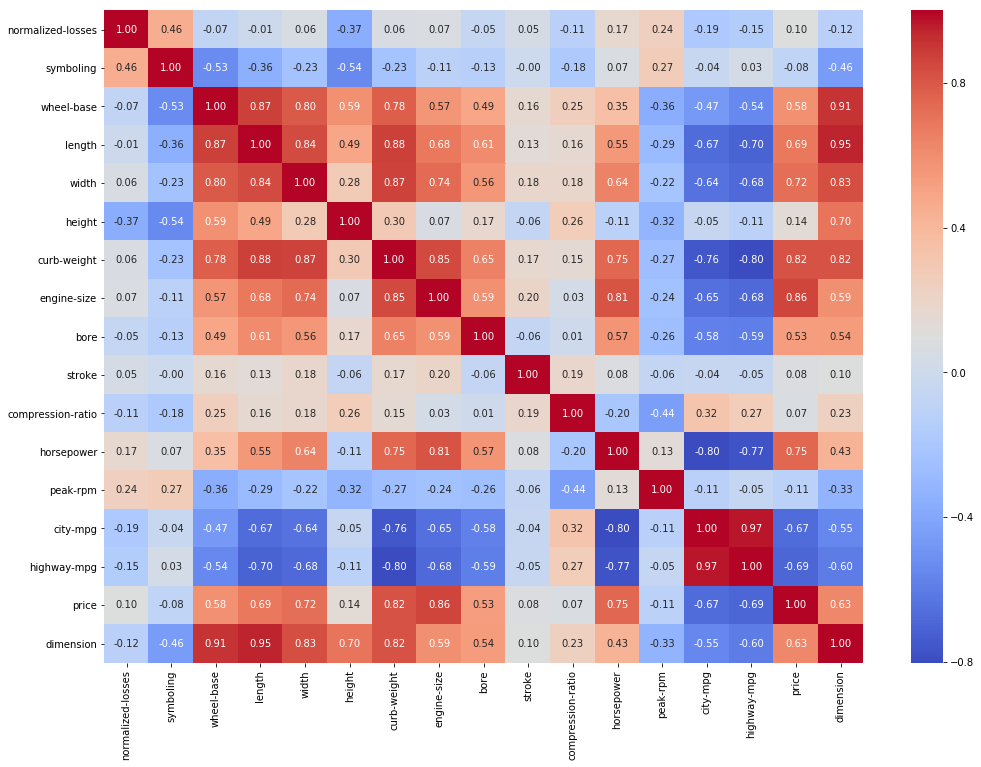

In [109]:
g=plt.figure(figsize=(17,12))
g = sns.heatmap(data.drop(['ID'], axis=1).corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

Mencari feature yang memiliki nilai korelasi yang cukup baik

# ----------------------------------------------- KMEANS -----------------------------------------------

## Menyiapkan data yang dipakai untuk di clustering

In [110]:
d_kmeans = data[['dimension', 'price']]
d_kmeans.head(3)

,dimension,price
0,528019.904,13495.0
1,528019.904,16500.0
2,587592.640,16500.0


## Mengubah Data Menjadi array

In [111]:
XK = np.asarray(d_kmeans)

## Plot Persebaran Data

Text(0.5,1,'Grafik Bagus')

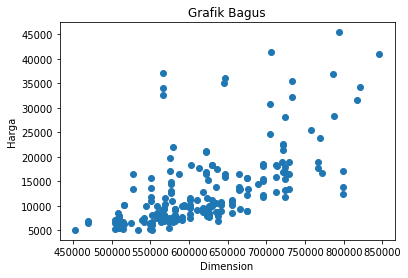

In [256]:
plt.scatter(XK[:,0],XK[:,1], label = 'True Position')
plt.xlabel("Dimension")
plt.ylabel("Harga")
plt.title("Grafik Bagus")

## Mencari Nilai K dengan Elbow

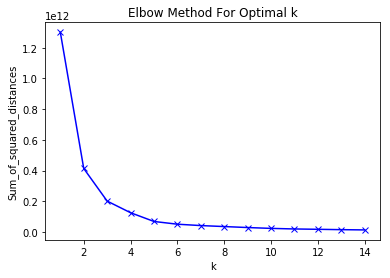

In [114]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(XK)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## Mencari nilai K dengan silhouette

In [115]:
from sklearn.metrics import silhouette_score
range_n_clusters = list (range(2,10))
for n_clusters in range_n_clusters:
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(df)
    centers = clusterer.cluster_centers_

    score = silhouette_score (df, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.7213570777280133)
For n_clusters = 3, silhouette score is 0.662137276548297)
For n_clusters = 4, silhouette score is 0.5813532473349762)
For n_clusters = 5, silhouette score is 0.5851011060079271)
For n_clusters = 6, silhouette score is 0.5855886006312803)
For n_clusters = 7, silhouette score is 0.5605660670996605)
For n_clusters = 8, silhouette score is 0.5629288579044323)
For n_clusters = 9, silhouette score is 0.5186728535854298)


## Melakukan aktivasi algoritma K-Means dengan K = 6

In [120]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Menampilkan nilai centroid yang dibangkitkan oleh algoritma kmeans 

In [121]:
print(kmeans.cluster_centers_)

[[620456.86907143  11622.14285714]
 [715042.82054839  19592.25806452]
 [507786.90111111   7437.14814815]
 [791468.77935714  25957.07142857]
 [568675.38504412  10432.08823529]
 [658747.95030435  14206.04347826]]


## Melihat beberapa data dan Clusternya

In [215]:
cluster_k = pd.DataFrame([kmeans.labels_])
d_kmeans['cluster'] = cluster_k.transpose()
d_kmeans['make'] = data['make'] 
d_kmeans.head()

,dimension,price,cluster,make
0,528019.904,13495.0,2,alfa-romero
1,528019.904,16500.0,2,alfa-romero
2,587592.640,16500.0,4,alfa-romero
3,634816.956,13950.0,0,audi
4,636734.832,17450.0,0,audi


## Visualisasi Hasil Clustering menggunakan Kmeans dengan Scatterplot 2D

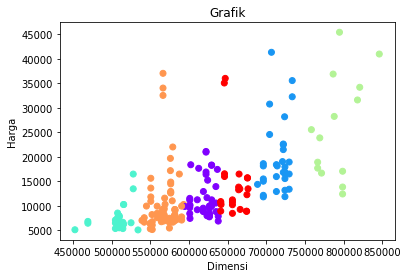

In [137]:
plt.scatter(XK[:,0],XK[:,1], c=kmeans.labels_, cmap='rainbow')
plt.ylabel("Harga")
plt.xlabel("Dimensi")
plt.title("Grafik")
plt.show()

## Visualisasi Hasil Clustering menggunakan Kmeans dengan Scatterplot 3D

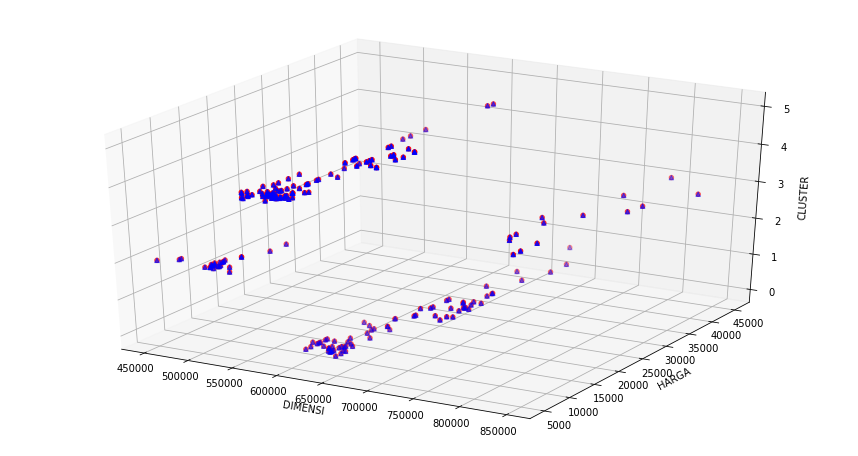

In [255]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = d_kmeans.dimension
    ys = d_kmeans.price
    zs = d_kmeans.cluster
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('DIMENSI')
ax.set_ylabel('HARGA')
ax.set_zlabel('CLUSTER')
plt.show()

# ----------------------------------------------- KMEANS -----------------------------------------------

# ------------------------------------------ HIERARCHICAL ------------------------------------------

## Menyiapkan data yang dipakai untuk di clustering menggunakan Hierarchical

In [144]:
d_hiera = data[['dimension', 'price']]
d_hiera.head()

,dimension,price
0,528019.904,13495.0
1,528019.904,16500.0
2,587592.640,16500.0
3,634816.956,13950.0
4,636734.832,17450.0


## Mengubah Data Menjadi array

In [145]:
XH = np.asarray(d_hiera)

## Plot Persebaran Data

Text(0.5,1,'Grafik Bagus')

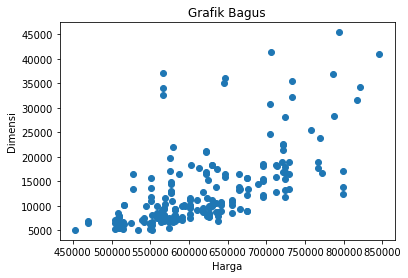

In [146]:
## Step 4. Menampilkan data ke dalam grafik scatterplot 
plt.scatter(XH[:,0],XH[:,1], label = 'True Position')
plt.xlabel("Harga")
plt.ylabel("Dimensi")
plt.title("Grafik Bagus")

## Membentuk dendogram dengan metode ward

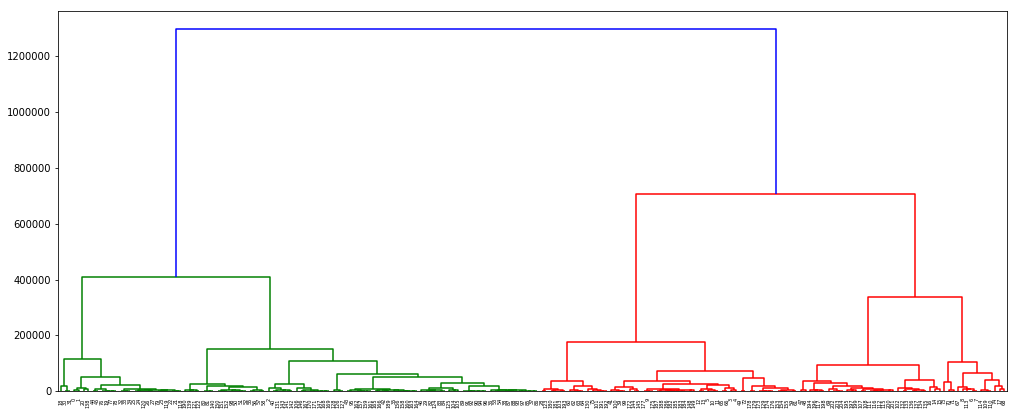

In [147]:
#import plotly.figure_factory as ff

plt.figure(figsize=(17,7))
dendrogram = sch.dendrogram(sch.linkage(XK, method='ward'))
                            #, orientation='left')#, labels=dataset.pintu_masuk)

## Mencari Linkage Yang Baik

In [209]:
feature = ["complete", "ward", "average", "single"]
for feature in feature :
    hc = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage=feature)
    hc.fit(d_hiera)
    labels = hc.labels_
    print(f"Linkage {feature} has score {silhouette_score(d_hiera,labels)}")

Linkage complete has score 0.32301178254607693
Linkage ward has score 0.5544587529837038
Linkage average has score 0.5402512776036998
Linkage single has score 0.22420138654923794


## Melakukan Fitting dengan beberapa macam linkage dengan cluster 6

In [249]:
# Melakukan fitting hierarchical clustering 
model1 = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
model1.fit(XK)
labels1 = model1.labels_

model2 = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='average')
model2.fit(XK)
labels2 = model2.labels_

model3 = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='complete')
model3.fit(XK)
labels3 = model3.labels_

model4 = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='single')
model4.fit(XK)
labels4 = model4.labels_

## Visualisasi Hasil Clustering menggunakan Hierarchichal 

Text(0.5,1,'Grafik')

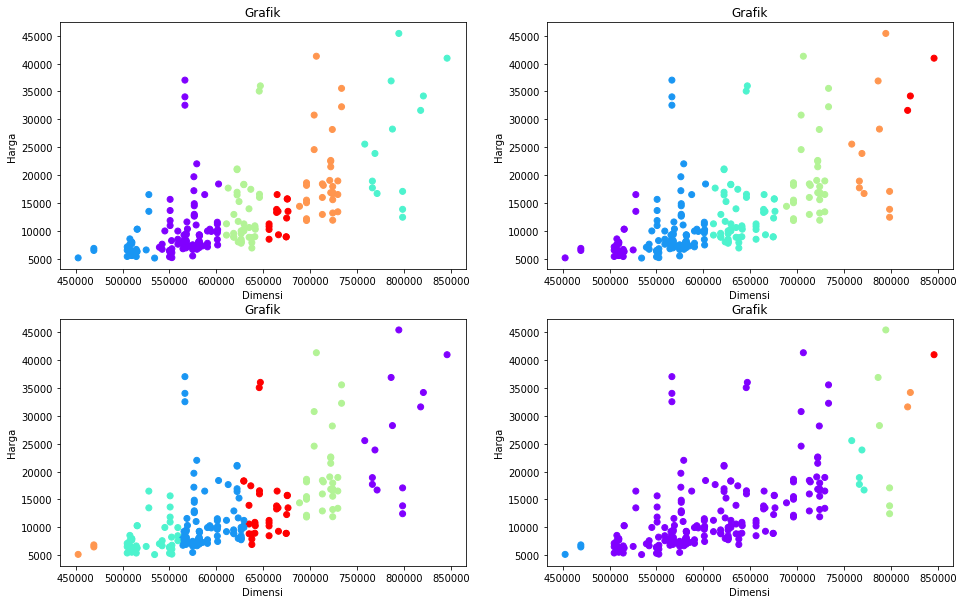

In [252]:
f=plt.figure(figsize=(16,10))
f.add_subplot(2,2,1)
plt.scatter(XH[:,0],XH[:,1], c=labels1, cmap='rainbow')
plt.ylabel("Harga")
plt.xlabel("Dimensi")
plt.title("Grafik")

f.add_subplot(2,2,2)
plt.scatter(XH[:,0],XH[:,1], c=labels2, cmap='rainbow')
plt.ylabel("Harga")
plt.xlabel("Dimensi")
plt.title("Grafik")

f.add_subplot(2,2,3)
plt.scatter(XH[:,0],XH[:,1], c=labels3, cmap='rainbow')
plt.ylabel("Harga")
plt.xlabel("Dimensi")
plt.title("Grafik")

f.add_subplot(2,2,4)
plt.scatter(XH[:,0],XH[:,1], c=labels4, cmap='rainbow')
plt.ylabel("Harga")
plt.xlabel("Dimensi")
plt.title("Grafik")\

Yang terlihat lebih rapi adalah plot nomor 3 dengan linkage : complete

# ------------------------------------------ HIERARCHICAL ------------------------------------------

# ----------------------------------------------- DBSCAN -----------------------------------------------

## Menyiapkan data yang dipakai untuk di clustering menggunakan Hierarchical

In [183]:
d_dbscan = data[['dimension', 'price']]
d_dbscan.head()

,dimension,price
0,528019.904,13495.0
1,528019.904,16500.0
2,587592.640,16500.0
3,634816.956,13950.0
4,636734.832,17450.0


## Mengubah Data Menjadi array

In [184]:
XD = np.asarray(d_dbscan)

## Plot Persebaran Data

Text(0.5,1,'Grafik Konsumen')

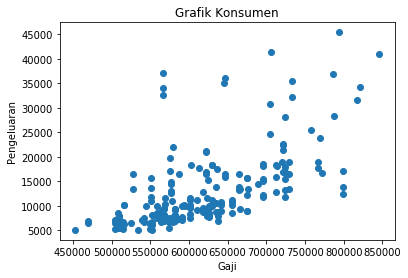

In [185]:
plt.scatter(XD[:,0],XD[:,1], label = 'True Position')
plt.xlabel("Gaji")
plt.ylabel("Pengeluaran")
plt.title("Grafik Konsumen")

## Melakukan aktivasi algoritma DBSCAN 

In [232]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=10000,min_samples=6)
dbscan.fit(XD)

DBSCAN(algorithm='auto', eps=10000, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=6, n_jobs=None, p=None)

nilai eps dan min_samples adalah hasil dari mencoba beberapa nilai sehingga menghasilkan cluster yang cukup

## Melihat Label hasil clustering

In [233]:
print(dbscan.labels_)

[-1 -1  0  0  0  0 -1 -1 -1  0  0  0  0  0 -1 -1 -1 -1 -1  1  1  1  1  1
  1  1  1  1  2  0 -1 -1  1  1  1  0  0  0  0  0  0  0  0  0  1  1  0 -1
 -1 -1  0  0  0  0  0  0  0  0  0  0  2  0  2  2  2  0  0 -1 -1  4 -1 -1
 -1 -1 -1  2  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  2  3  2  0  0  0  4  4 -1 -1  4  4 -1 -1  4  4  4  1  1
  1  0  0  2  0  0 -1 -1 -1  0  2  0  3  3  3  3  3  3  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  2  2  0  0  0  0  0  0  0  0  0  2
  2  2  4  4  4  4  4  4  4  4  4  4  4]


Terlihat hasil memiliki banyak noise tetapi juga menghasilkan cluster yang cukup

## Visualisasi Hasil Clustering menggunakan Kmeans dengan Scatterplot 2D

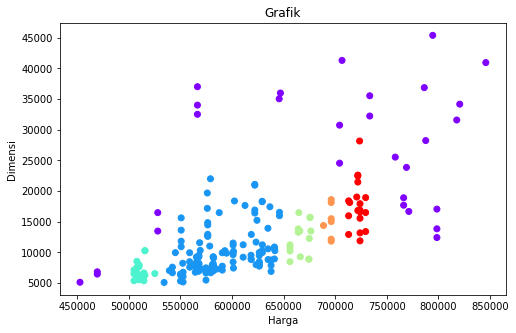

In [235]:
plt.figure(figsize=(8,5))
plt.scatter(XD[:,0],XD[:,1], c=dbscan.labels_, cmap='rainbow')
plt.xlabel("Harga")
plt.ylabel("Dimensi")
plt.title("Grafik")
plt.show()

# ----------------------------------------------- DBSCAN -----------------------------------------------

## Kesimpulan

    1. Cluster yang saya buat adalah 6 cluster. saya memilih 6 cluster setelah melihat nilai dari Silhouette dan Elbow. Feature yang saya gunakan adalah fitur price dan fitur length, width, height yang digabung dalam feature baru bernama dimension 
    2. Saya memilih mengambil algoritma clustering K-Means karena lebih gampang untuk diimplementasikan dan hasilnyapun baik berdasarkan hasil cluster dan visualisasi
    3. Tiap Clusster memiliki ciri yang berbeda. cluster lebih banyak dipengaruhi besar dimensi mobil dan juga sedikit dipengaruhi dari harga mobil. 
    * Cluster 1 : harga rendah dimensi kecil
    * Cluster 6 : harga rendah dan tinggi dimensi kecil
    * Cluster 6 : harga rendah dimensi sedang
    * Cluster 6 : harga sedang dan tinggi dimensi sedang
    * Cluster 6 : harga sedang dan tinggi dimensi besar
    * Cluster 6 : harga tinggi dimensi besar
    